# Energy efficiency prediction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:

%cd /content/drive/MyDrive/EnergyEfficiencyPrediction-main

/content/drive/MyDrive/EnergyEfficiencyPrediction-main


## Load data

In [4]:
import pandas as pd

seed = 42
test_size = 0.2

In [5]:
listings_df = pd.read_csv('data/Listings_FE.csv')
print(listings_df.columns)
display(listings_df)
print(listings_df['Listing Description'])

Index(['Advertisement Id', 'Advertisement Version Id',
       'Day of Advertisement Created', 'Day of Date Available From',
       'Geo Canton', 'Geo City', 'Geo Zip', 'PropertyID', 'Are Pets Allowed',
       'Category Idx', 'Floor', 'Form Lead Unique', 'Has Balcony',
       'Has Cabletv', 'Has Elevator', 'Has Fireplace', 'Has Garage',
       'Has Parking', 'Is New Construction', 'Is New Construction Potential',
       'Is Tenant2Tenant', 'Is Wheelchairaccessible', 'Jahr',
       'Leerwohnungsziffer', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Rent_hypothetical', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated', 'Akonto_M2_Normalized',
       'PropertyFE', 'Property Reference Id'],
      dtype='object')


,Advertisement Id,Advertisement Version Id,Day of Advertisement Created,Day of Date Available From,Geo Canton,Geo City,Geo Zip,PropertyID,Are Pets Allowed,Category Idx,...,Price M2 Normalized,Price Net Normalized,Rent_hypothetical,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated,Akonto_M2_Normalized,PropertyFE,Property Reference Id
0,105369788,11,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,16.0,1100.0,NaN,81.0,Apartment,NaN,NaN,2.901235,118.808888,9393.61.5829
1,105369788,12,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,15.0,1100.0,NaN,81.0,Apartment,NaN,NaN,1.851852,118.808888,9393.61.5829
2,105380808,15,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
3,105380808,16,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
4,105380808,18,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94221,3001857722,1,2022-05-10 02:00:00,"August 1, 2022",AG,Kölliken,5742,5608,1.0,APPT,...,17.0,1350.0,NaN,94.0,Apartment,1995.0,NaN,2.765957,78.672787,5608.61.9754
94222,3001857723,1,2022-05-10 02:00:00,"June 1, 2022",VD,Montreux,1820,7461,NaN,APPT,...,20.0,1850.0,NaN,115.0,Apartment,1991.0,2008.0,3.478261,116.051448,7461.83.9894
94223,3001857724,1,2022-05-10 02:00:00,"May 1, 2022",ZH,Zürich,8048,9198,1.0,APPT,...,37.0,1420.0,NaN,40.0,Apartment,1977.0,2014.0,1.600000,92.338857,9198.61.5606
94224,3001857725,2,2022-05-10 02:00:00,"August 1, 2022",ZH,Zürich,8047,2970,NaN,APPT,...,35.0,2885.0,NaN,91.0,Apartment,1948.0,1997.0,2.912088,39.669587,2970.61.7877


0        Au coeur d'un quartier calme et verdoyant, ce ...
1        Au coeur d'un quartier calme et verdoyant, ce ...
2        Affittiamo appartamento di 4.5 locali in zona ...
3        Affittiamo appartamento di 4.5 locali in zona ...
4        Affittiamo bellissimo appartamento di 4.5 loca...
                               ...                        
94221    Per 01.08.2022 oder nach Vereinbarung vermiete...
94222    Appartement dans un immeuble des années 90, id...
94223    Wir vermieten eine helle 1.5-Zimmerwohnung an ...
94224    Die 3-Zimmer-Maisonettewohnung mit Loft-Charak...
94225    Wir vermieten an der Viaduktstrasse 6 in Heris...
Name: Listing Description, Length: 94226, dtype: object


In [6]:
"""properties_train = pd.read_csv('data/train_data_properties2.csv')['Property Reference Id'].unique().tolist()
properties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()

# select the properties that are in the train and test sets
text_train = listings_df[listings_df['Property Reference Id'].isin(properties_train)]
text_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]


# only keep the last advertisement version
text_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]
text_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]


# delete the rows where the text is empty
text_train = text_train.dropna(subset=['Listing Description'])

# sort the sets according to original split
text_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, ordered=True)
text_train = text_train.sort_values('Property Reference Id')

text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)
text_test = text_test.sort_values('Property Reference Id')
"""


"properties_train = pd.read_csv('data/train_data_properties2.csv')['Property Reference Id'].unique().tolist()\nproperties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()\n\n# select the properties that are in the train and test sets\ntext_train = listings_df[listings_df['Property Reference Id'].isin(properties_train)]\ntext_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]\n\n\n# only keep the last advertisement version\ntext_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]\ntext_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]\n\n\n# delete the rows where the text is empty\ntext_train = text_train.dropna(subset=['Listing Description'])\n\n# sort the sets according to original split\ntext_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, or

In [7]:
import pandas as pd

# Load the data
properties_train = listings_df['Property Reference Id'].unique().tolist()
properties_test = pd.read_csv('data/test_data_properties2.csv')['Property Reference Id'].unique().tolist()

# Filter the properties to get text_train and text_test
text_train = listings_df[~listings_df['Property Reference Id'].isin(properties_test)]  # Keep all except test data
text_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]

# Only keep the last advertisement version
#text_train = text_train.loc[text_train.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]
#text_test = text_test.loc[text_test.groupby('Property Reference Id')['Advertisement Version Id'].idxmax()]

# Delete the rows where the text is empty
text_train = text_train.dropna(subset=['Listing Description'])

# Sort the sets according to the original split
text_train['Property Reference Id'] = pd.Categorical(text_train['Property Reference Id'], categories=properties_train, ordered=True)
text_train = text_train.sort_values('Property Reference Id')

text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)
text_test = text_test.sort_values('Property Reference Id')

# Now text_train contains all the data except for the test data and sorted accordingly


<ipython-input-7-e9fe4d5284ea>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_test['Property Reference Id'] = pd.Categorical(text_test['Property Reference Id'], categories=properties_test, ordered=True)


In [8]:
print(text_test)

       Advertisement Id  Advertisement Version Id  \
90893        3001661743                         1   
856           106079200                         4   
92056        3001704202                         1   
79633        3000952725                         1   
39369        2147635637                         1   
...                 ...                       ...   
965           106119419                         1   
23442         108168653                         2   
16706         107315191                         1   
16707         107315191                         2   
32113         108985151                         2   

      Day of Advertisement Created Day of Date Available From Geo Canton  \
90893          2022-02-03 01:00:00                May 1, 2022         AG   
856            2016-10-19 02:00:00                        NaN         AG   
92056          2022-02-23 01:00:00                May 1, 2022         AG   
79633          2021-03-10 01:00:00              April 1, 20

In [9]:
%cd text

/content/drive/MyDrive/EnergyEfficiencyPrediction-main/text


In [10]:
%ls

energy_efficiency.ipynb  model/  __pycache__/  regression_FE.py  text_predictions.csv


In [12]:
from regression_FE import *
from transformers import BertTokenizer, BertModel

# Parameters
MAX_LEN = 500
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 15
LEARNING_RATE = 2e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BERTRegressor('bert-base-multilingual-cased').to(device)

# Create the dataset
train_dataset = ListingsDataset(text_train, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = ListingsDataset(text_test, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Loss function
criterion = nn.MSELoss()

In [ ]:
# Train and save the model
train(model, train_loader, test_loader, criterion, optimizer, device, EPOCHS, save_path="model/text_model_full.pth")


Training: 100%|██████████| 10233/10233 [47:34<00:00,  3.59it/s]


Epoch 1/15
Train loss: nan
Test loss: nan


Training: 100%|██████████| 10233/10233 [47:26<00:00,  3.60it/s]


Epoch 2/15
Train loss: nan
Test loss: nan


Training: 100%|██████████| 10233/10233 [47:23<00:00,  3.60it/s]


Epoch 3/15
Train loss: nan
Test loss: nan


Training:  45%|████▍     | 4588/10233 [21:13<25:39,  3.67it/s]

In [ ]:
import torch
saved_model = BERTRegressor('bert-base-multilingual-cased')
saved_model.load_state_dict(torch.load('model/text_model_full.pth'))
saved_model.to(device)

In [ ]:
eval_model(saved_model, test_loader, criterion, device)

In [ ]:
# save the predictions
predictions = []
labels = []

saved_model.eval()
with torch.no_grad():
    for d in test_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = saved_model(input_ids=input_ids, attention_mask=attention_mask)
        predictions.extend(outputs.cpu().numpy().flatten().tolist())
        labels.extend(d["targets"].cpu().numpy().flatten().tolist())


predictions_df = pd.DataFrame({
    'Property Reference Id': properties_test,
    'Predicted FE': predictions,
    'Actual FE': labels
})

print(predictions_df)

predictions_df.to_csv("text_predictions.csv")


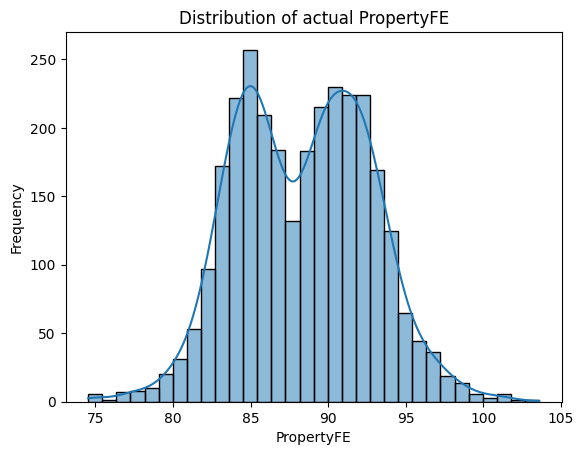

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(predictions_df['Predicted FE'].tolist(), kde=True)
plt.title('Distribution of actual PropertyFE')
plt.xlabel('PropertyFE')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

mean_actual = predictions_df['Actual FE'].mean()

mean_predictions = np.full_like(predictions_df['Actual FE'], mean_actual)

mse = np.mean((predictions_df['Actual FE'] - mean_predictions) ** 2)

print("Baseline Mean Squared Error (MSE) when only predicting the mean:", mse)

Baseline Mean Squared Error (MSE) when only predicting the mean: 943.9550822352422


# Bert using expanded Keywords